# **SME5924 - Processos Dinâmicos em Redes Complexas**


---


## **Questionário 1**

### Gabriela dos Santos Amaral - 13749681

# **Introdução**

Notebook contendo os códigos desenvolvidos na linguagem *Python* para responder o questionário 1 da disciplina de Processos Dinâmicos em Redes Complexas (SME5924).

In [1]:
# Bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import requests

import random
import math

# **Questão 1:** Para a rede do livro "Os miseráveis" (base lesmis), calcule o terceiro e quarto momento do grau. Considere o maior componente conectado.



Primeiro, vamos ler os dados lesmis e visualizar o grafo:

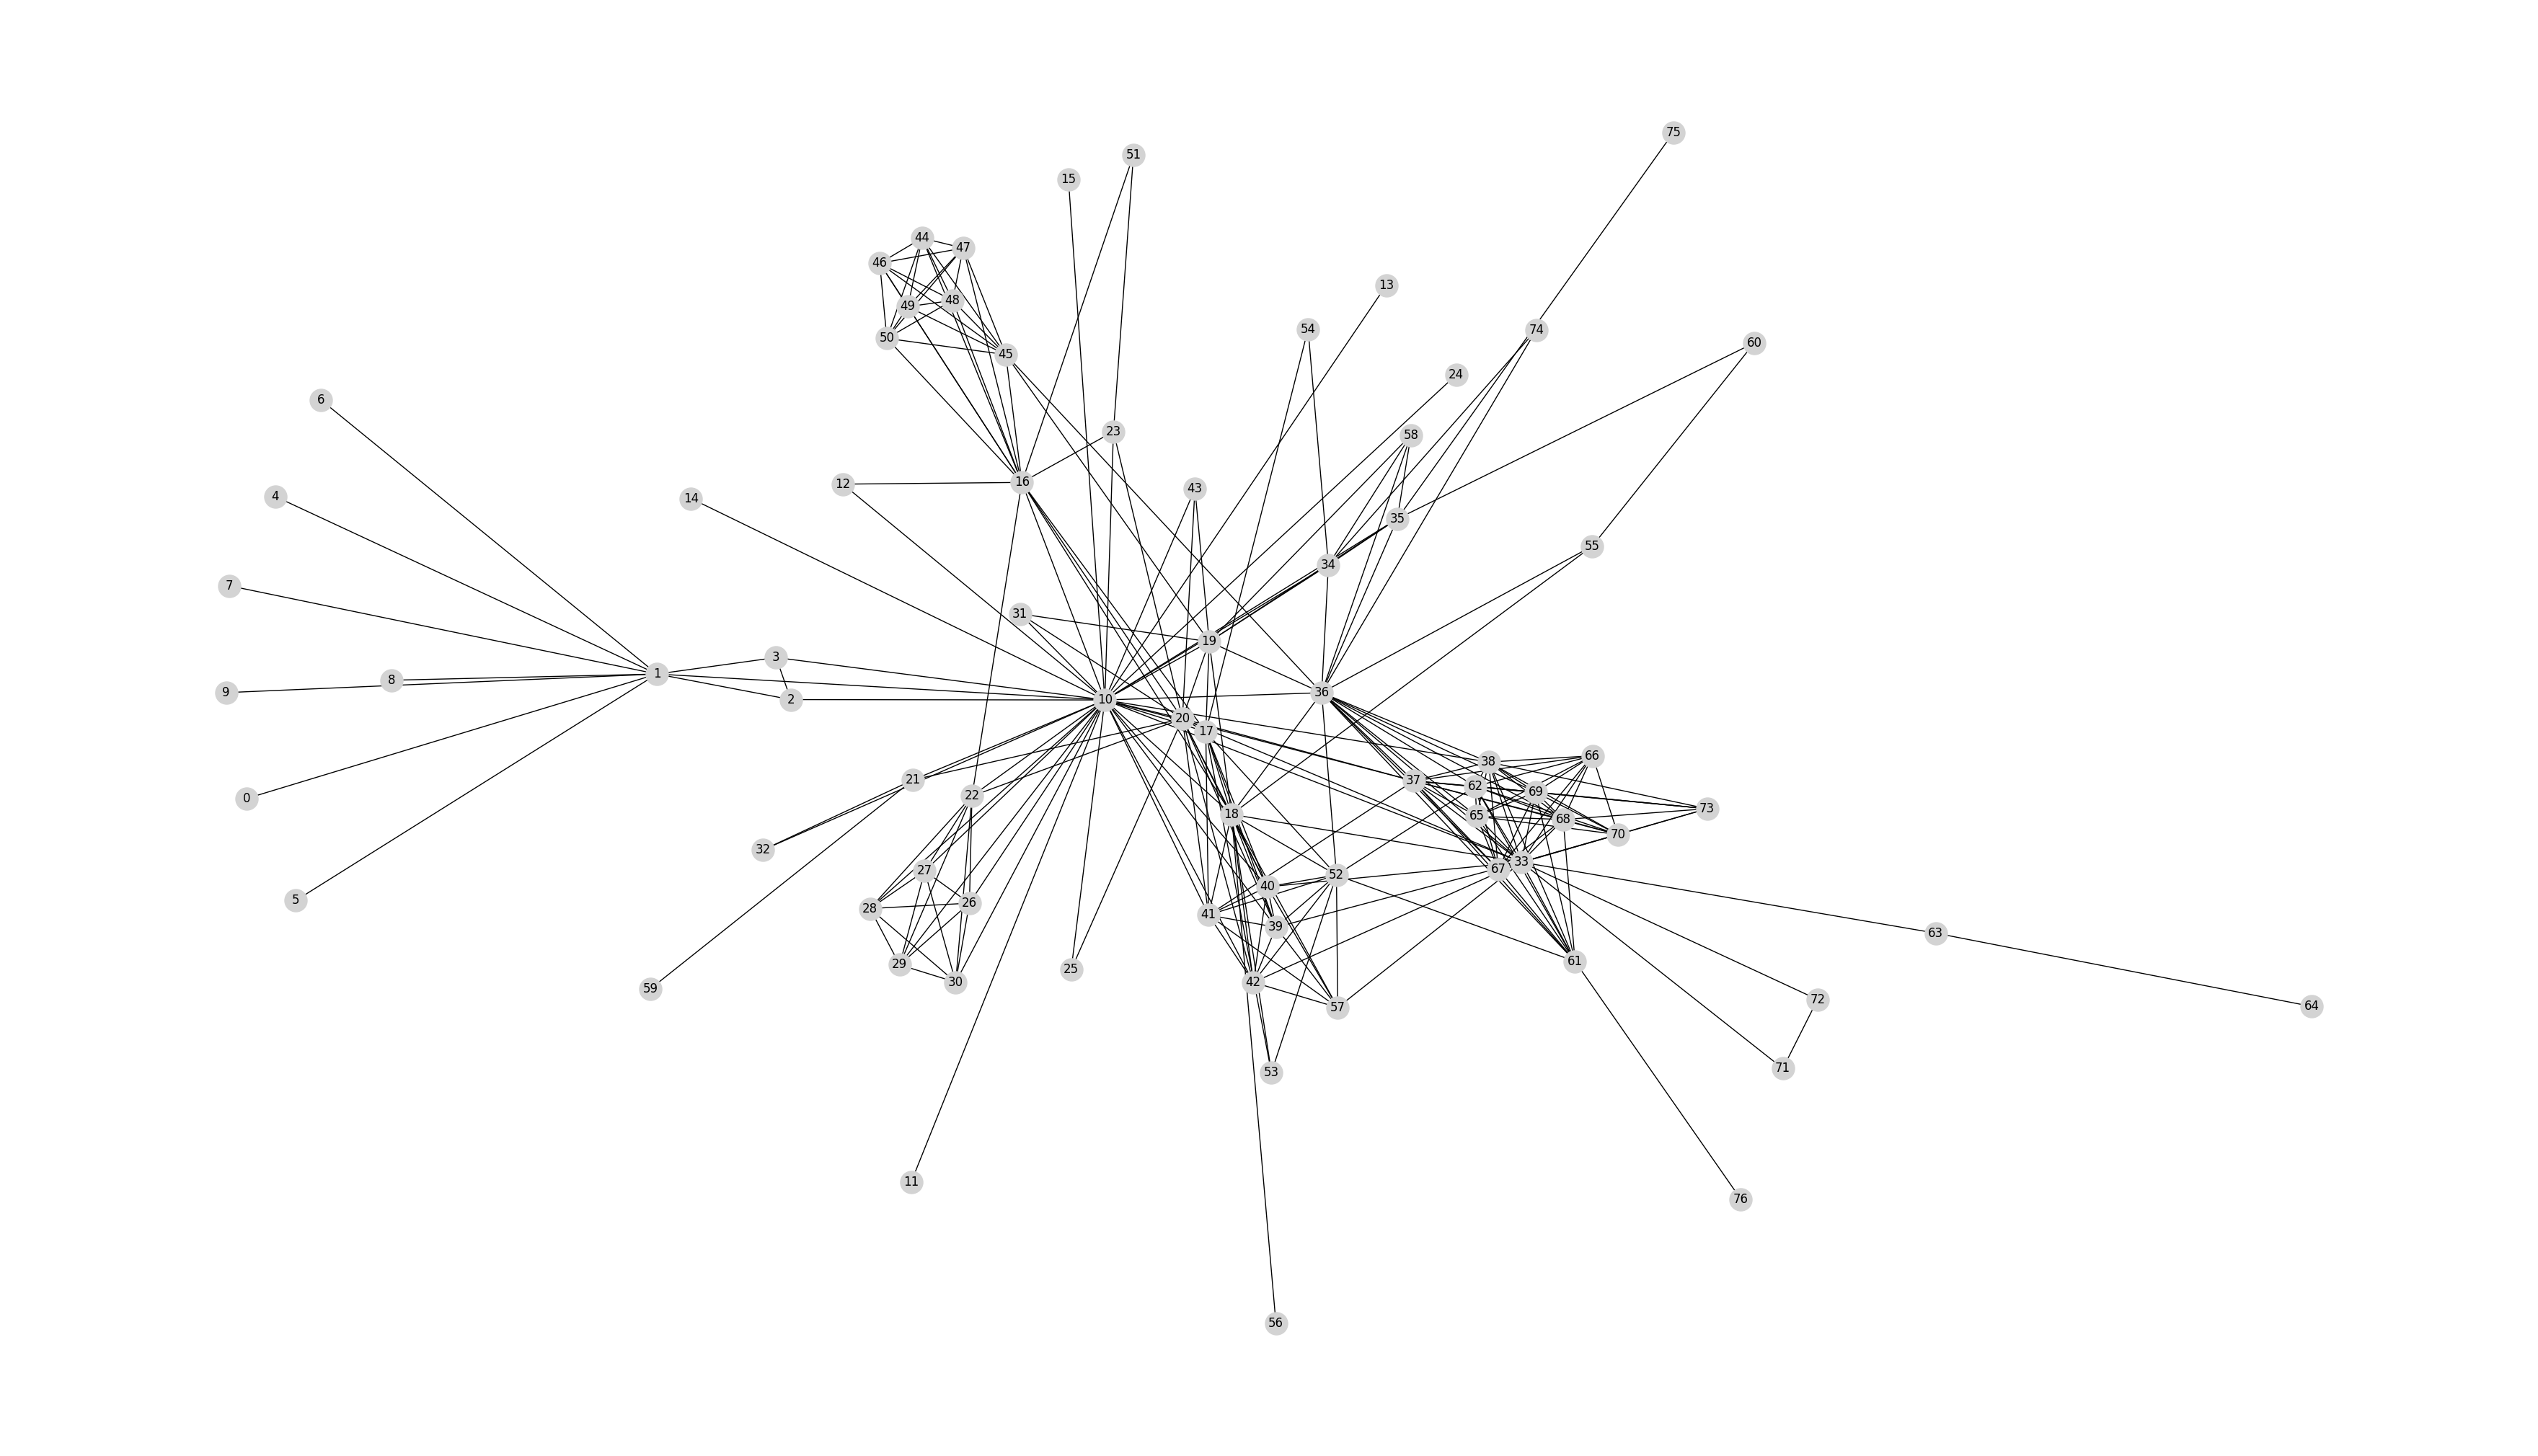

In [2]:
# Leitura da rede
network = 'lesmis'
url = f'https://raw.githubusercontent.com/GabrielaSAmaral/ComplexNetworks/main/Dados/{network}.txt'

response = requests.get(url)
with open(f'{network}.txt', 'w') as file:
    file.write(response.text)

G = nx.read_edgelist(f'{network}.txt', nodetype=int, data=(('weight',float),))

# Transformando os labels para números inteiros, começando com 0
G = nx.convert_node_labels_to_integers(G, first_label=0)

# Para visualizar a rede
plt.figure(figsize=(35,20))
pos = nx.spring_layout(G, seed = 11) # Definindo uma seed para sempre obter o mesmo gráfico (mesmas posições)
nx.draw(G, pos, node_color='lightgray', node_size=500, with_labels=True)

In [3]:
# Para tranformar a rede em sem direção. Porém, como a rede já é não direcionada, o código não é necessário.
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

Vamos selecionar apenas o maior componente conectado:

In [4]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# Outra forma
# Gcc = max(nx.connected_components(G), key=len)
# G = G.subgraph(Gcc).copy()

Podemos verificar o número de vértices (nodes) e arestas (edges):

In [5]:
N = len(G)
M = G.number_of_edges()
print('Número de nós (vértices):', N)
print('Número de arestas:', M)

Número de nós (vértices): 77
Número de arestas: 254


Agora, iremos definir uma função para calcular o m-ésimo momento:

In [6]:
def momment(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

In [7]:
print('Primeiro momento de k:', "%3.2f"%momment(G,1))
print('Segundo momento de k:', "%3.2f"%momment(G,2))
print('Terceiro momento de k:', "%3.2f"%momment(G,3))
print('Quarto momento de k:', "%3.2f"%momment(G,4))

Primeiro momento de k: 6.60
Segundo momento de k: 79.53
Terceiro momento de k: 1408.03
Quarto momento de k: 33592.73


Portanto, o terceiro e quarto momento do grau são iguais a 1408.03 e 33592.73, respectivamente.

# **Questão 2:** Implemente uma rotina para calcular a medida de complexidade. Qual o valor da complexidade para a rede de energia elétrica dos EUA (Base powergrid).



Primeiro, vamos ler os dados powergrid e visualizar o grafo:

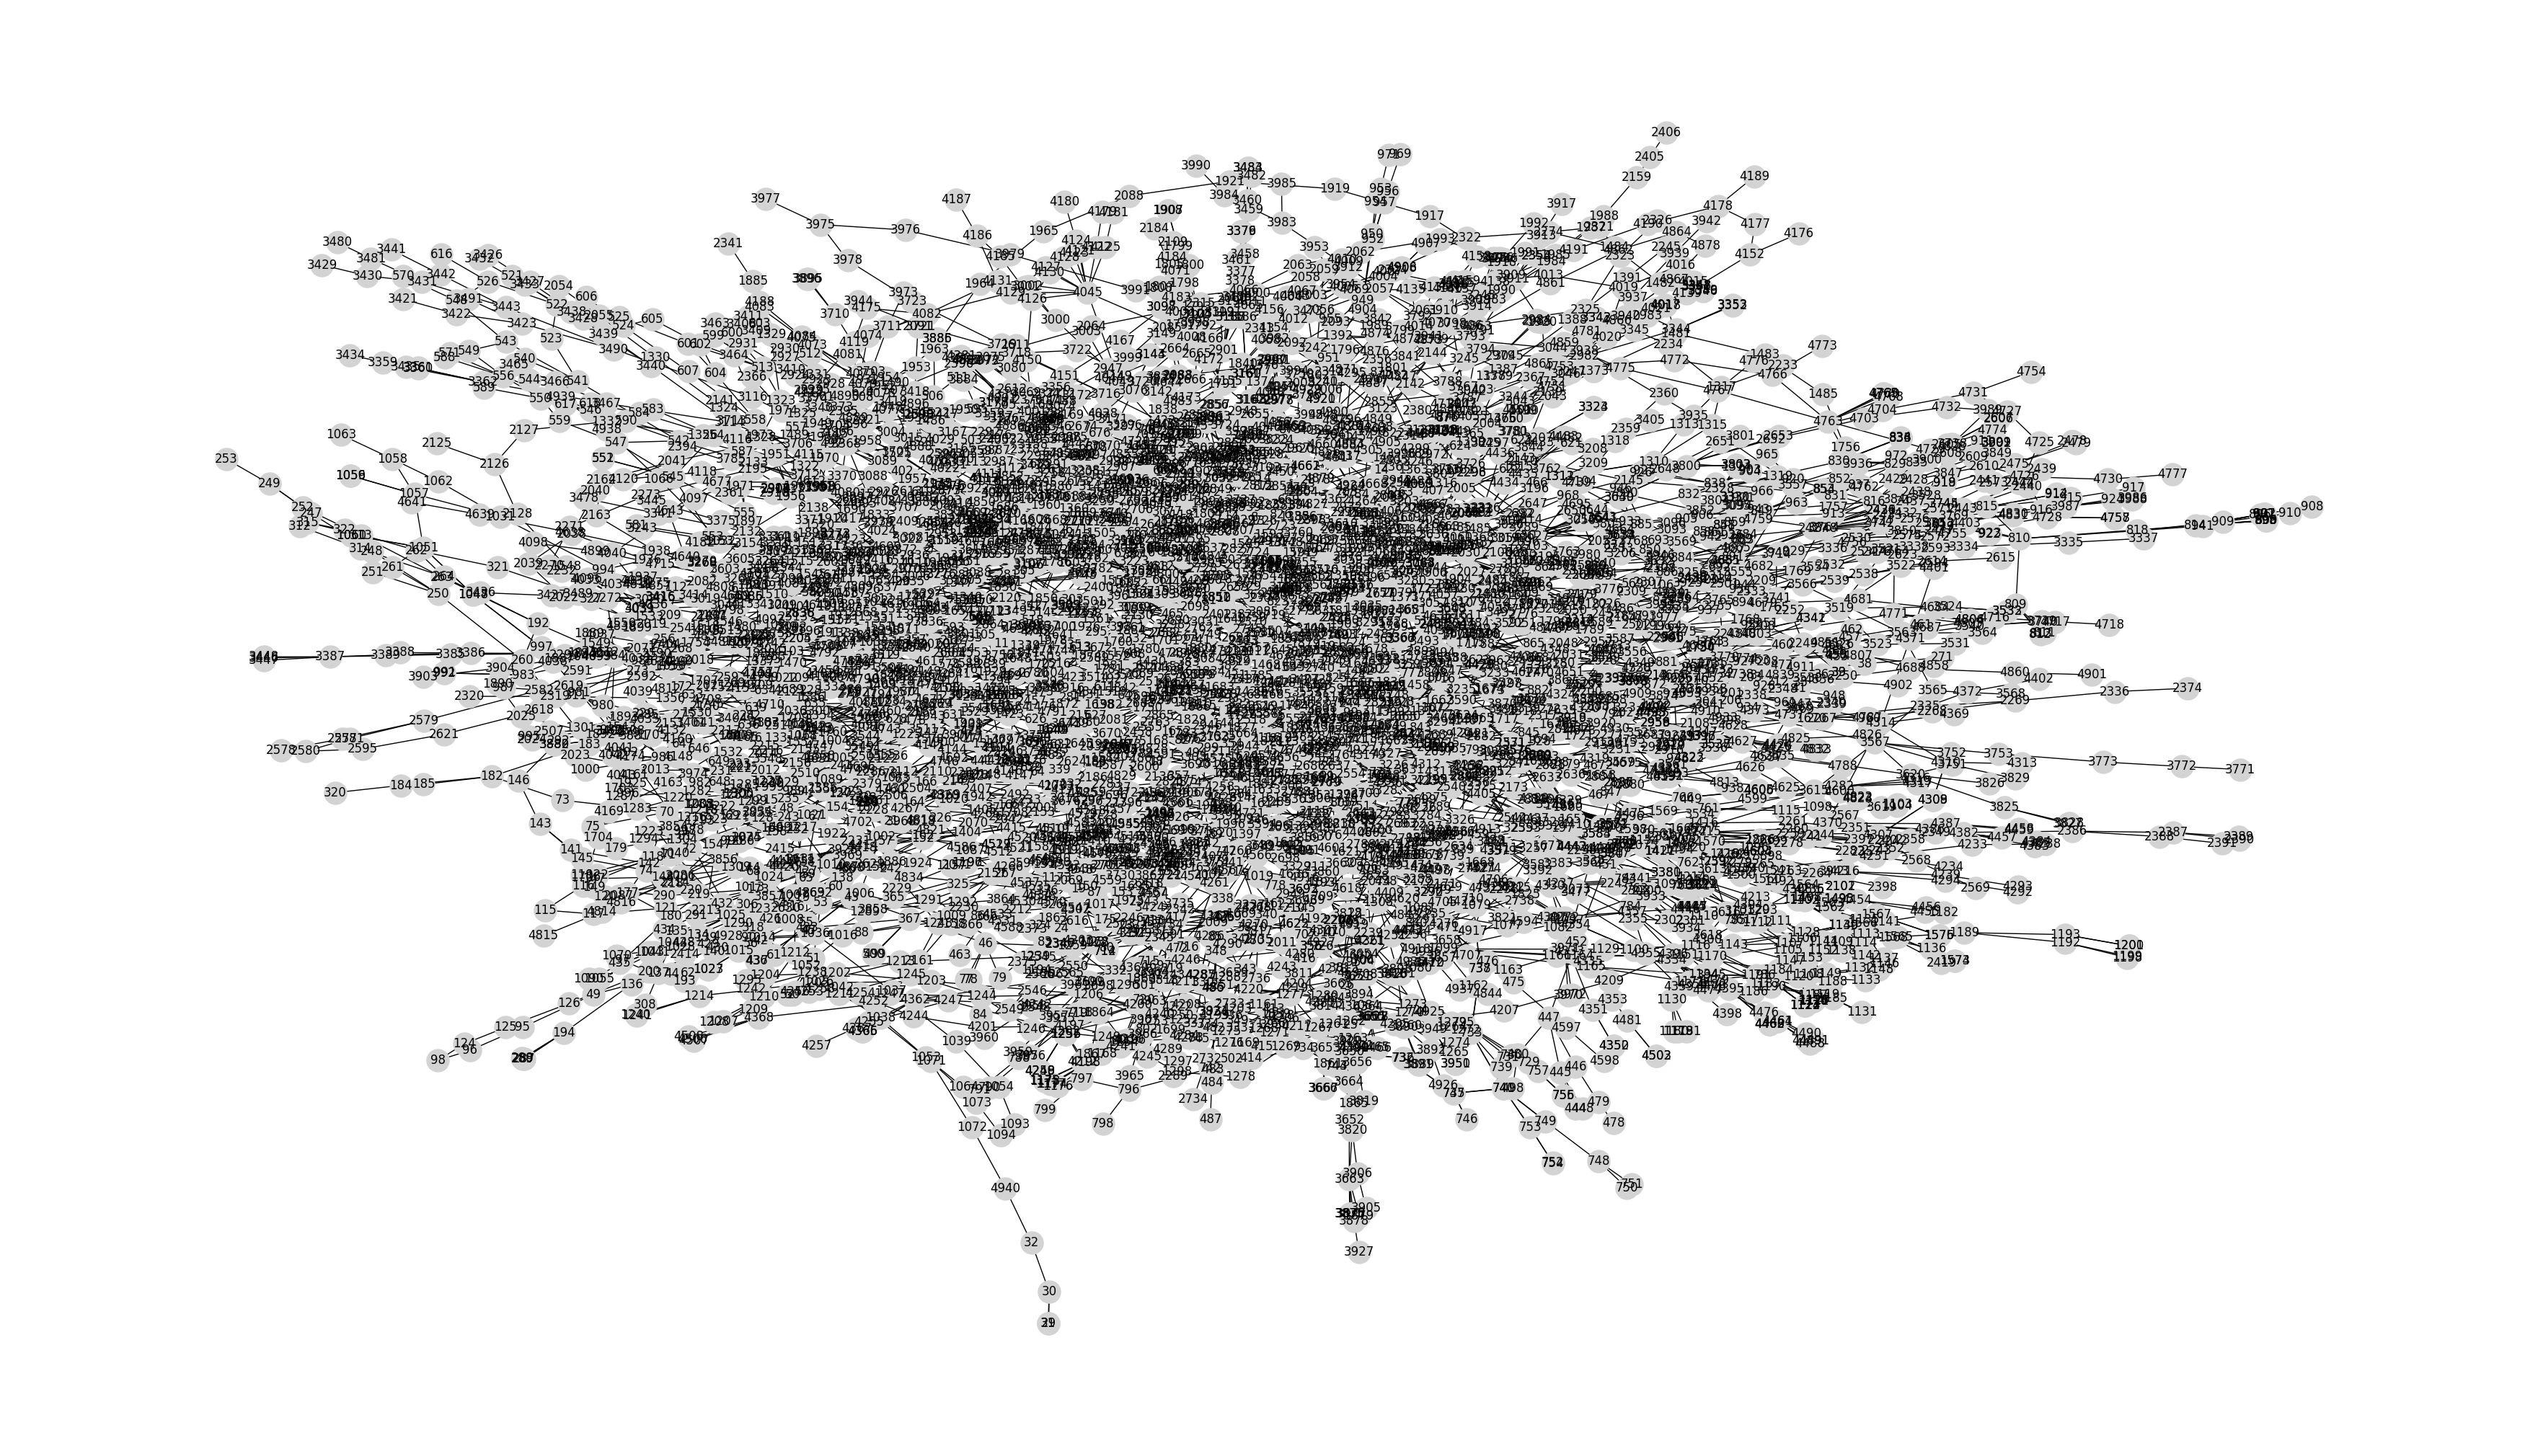

In [8]:
# Leitura da rede
network = 'powergrid'
url = f'https://raw.githubusercontent.com/GabrielaSAmaral/ComplexNetworks/main/Dados/{network}.txt'

response = requests.get(url)
with open(f'{network}.txt', 'w') as file:
    file.write(response.text)

G2 = nx.read_edgelist(f'{network}.txt', nodetype=int)

# Transformando os labels para números inteiros, começando com 0
G2 = nx.convert_node_labels_to_integers(G2, first_label=0)

# Para visualizar a rede
plt.figure(figsize=(35,20))
pos = nx.spring_layout(G2, seed = 13) # Definindo uma seed para sempre obter o mesmo gráfico (mesmas posições)
nx.draw(G2, pos, node_color='lightgray', node_size=500, with_labels=True)

Podemos verificar o número de vértices (nodes) e arestas (edges):

In [9]:
N = len(G2)
M = G2.number_of_edges()
print('Número de nós (vértices):', N)
print('Número de arestas:', M)

Número de nós (vértices): 4941
Número de arestas: 6594


Agora, iremos utilizar a função que calcular o m-ésimo momento, apresentada na questão anterior, e a usaremos para implementar uma função que calcula o coeficiente de complexidade.

In [10]:
def momment(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

In [11]:
def coef_complexity(G):

  momment_k1 = momment(G, 1)
  momment_k2 = momment(G, 2)

  coef_complexity = momment_k2/momment_k1

  return coef_complexity

O valor da complexidade para a rede de energia elétrica dos EUA é de 3.87, como calculado a seguir:

In [12]:
print("%3.2f"%coef_complexity(G2))

3.87


Outra forma de fazer esse cálculo é utilizando a função de distribuição do grau, como feito a seguir:

In [13]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # lista com os valores dos graus
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possíveis valores para k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # a soma dos elementos de P(k) deve ser igual a um
    return kvalues,Pk

In [14]:
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

In [15]:
def coef_complexity(G):

  momment_of_degree_distribution_k1 = momment_of_degree_distribution(G, 1)
  momment_of_degree_distribution_k2 = momment_of_degree_distribution(G, 2)

  coef_complexity = momment_of_degree_distribution_k2/momment_of_degree_distribution_k1

  return coef_complexity

In [16]:
print("%3.2f"%coef_complexity(G2))

3.87


Temos que a medida de complexidade (3.87) não é alta. Assim, a rede de energia elétrica dos EUA é pouco complexa. Porém, seria interessante comparar esse valor com a complexidade de outra(s) rede(s) para maiores conclusões.

Adicionalmente, iremos podemos plotar o gráfico da da distribuição do grau:

In [17]:
ks, Pk = degree_distribution(G2)

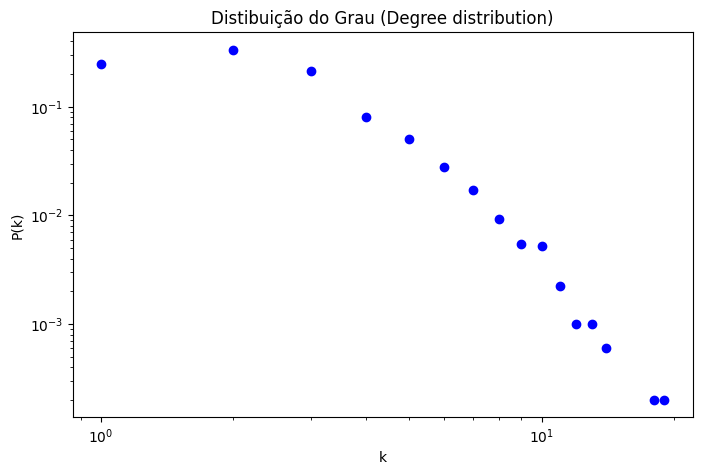

In [18]:
plt.figure(figsize=(8,5))

fig = plt.subplot(1,1,1)
fig.set_xscale('log')
fig.set_yscale('log')
plt.plot(ks,Pk,'bo')

plt.xlabel('k', fontsize=10)
plt.ylabel('P(k)', fontsize=10)
plt.title('Distibuição do Grau (Degree distribution)', fontsize=12)

# plt.grid(True)
# plt.savefig('degree_dist.eps') #save the figure into a file
plt.show(True)

Podemos observar que a distribuição do grau aparenta ser uma linha reta, embora ela apresente uma certa curvatura no início. Isso sugere que a função pode seguir uma lei de potência na maior parte do intervalo.

# **Questão 3:** Implemente uma rotina para calcular a entropia de Shannon e calcule essa medida para a base de estradas da Europa (base euroroad).



Primeiro, vamos ler os dados euroroad e visualizar o grafo:

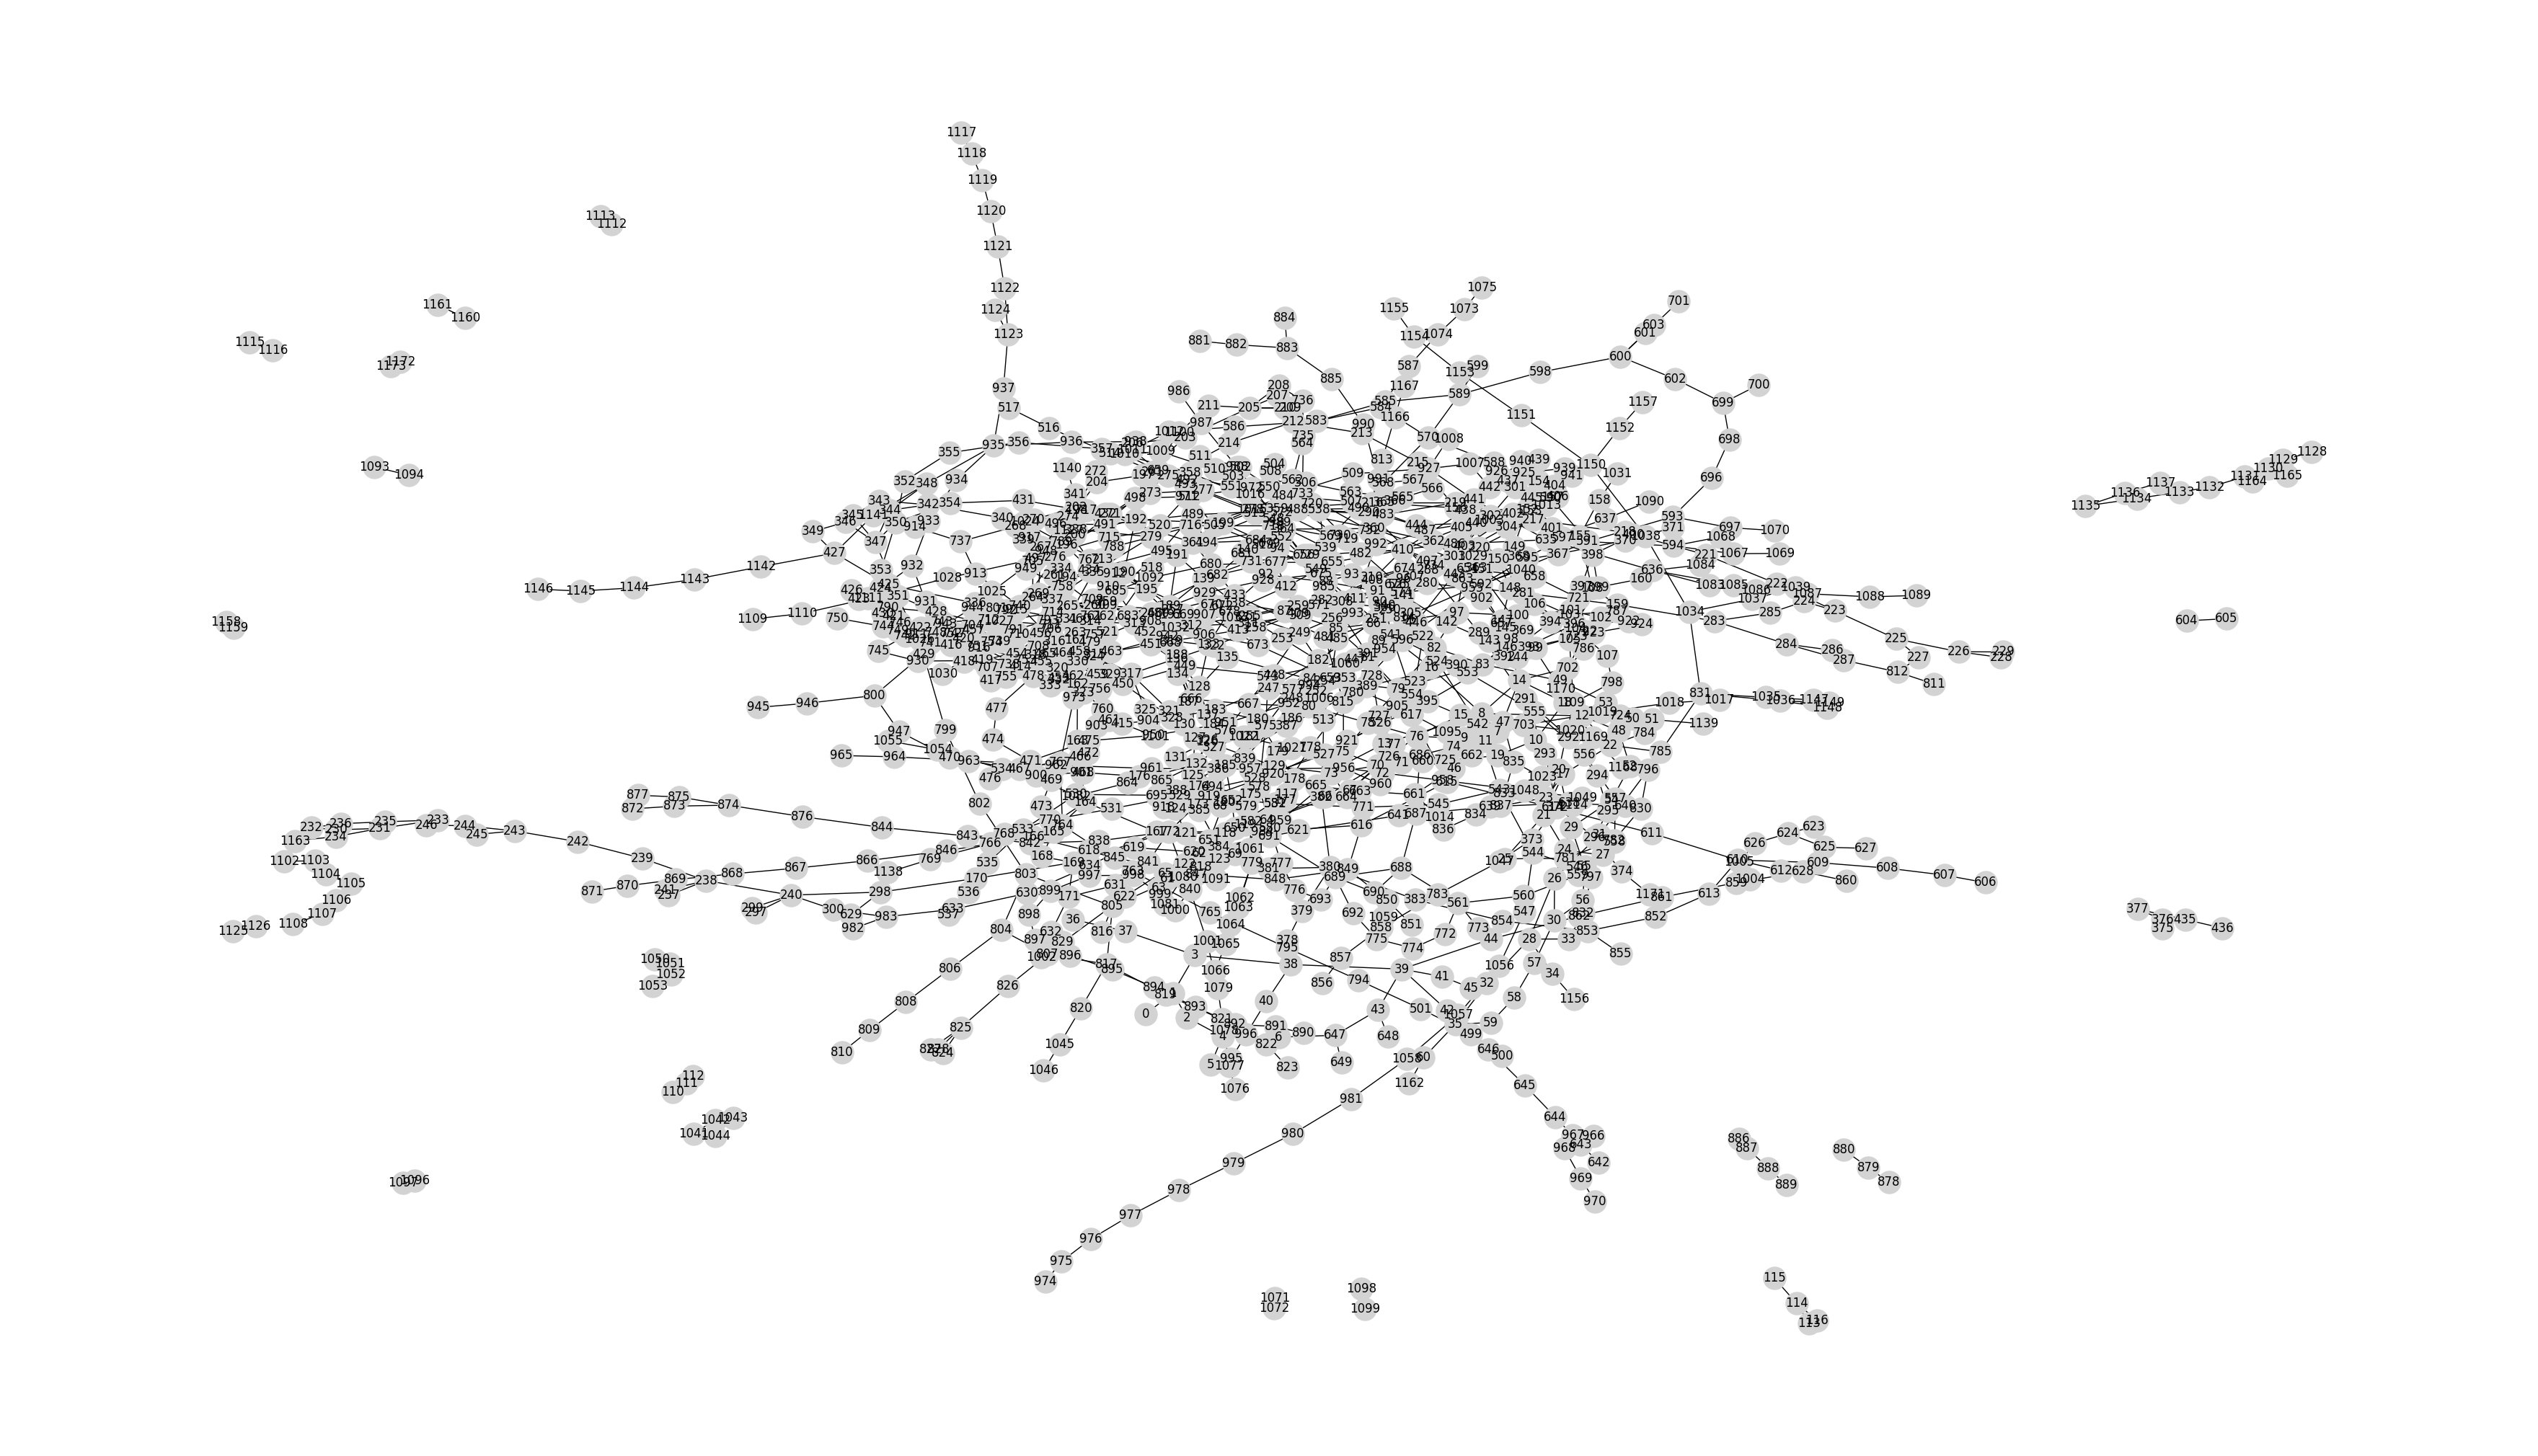

In [19]:
# Leitura da rede
network = 'euroroad'
url = f'https://raw.githubusercontent.com/GabrielaSAmaral/ComplexNetworks/main/Dados/{network}.txt'

response = requests.get(url)
with open(f'{network}.txt', 'w') as file:
    file.write(response.text)

G3 = nx.read_edgelist(f'{network}.txt', nodetype=int)

# Transformando os labels para números inteiros, começando com 0
G3 = nx.convert_node_labels_to_integers(G3, first_label=0)

# Para visualizar a rede
plt.figure(figsize=(35,20))
pos = nx.spring_layout(G3, seed = 12) # Definindo uma seed para sempre obter o mesmo gráfico (mesmas posições)
nx.draw(G3, pos, node_color='lightgray', node_size=500, with_labels=True)

Podemos verificar o número de vértices (nodes) e arestas (edges):

In [20]:
N = len(G3)
M = G3.number_of_edges()
print('Número de nós (vértices):', N)
print('Número de arestas:', M)

Número de nós (vértices): 1174
Número de arestas: 1417


A seguir, uma função para calcular a entropia de Shannon, que mede o nível de heterogeneidade nas conexões da rede:

In [21]:
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

In [22]:
H = shannon_entropy(G3)
print("Shannon Entropy = ", "%3.2f"%H)

Shannon Entropy =  2.00


Também é possível calcular a Entropia de Shannon Normalizada:

In [23]:
def normalized_shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H/math.log(len(G),2)

In [24]:
H2 = normalized_shannon_entropy(G3)
print("Shannon Entropy = ", "%3.2f"%H2)

Shannon Entropy =  0.20


Podemos interpretar que a rede é pouco complexa, pois apresenta uma entropia de Shannon (2) baixa. Dessa forma, é necessário pouca informação para explicar a topologia dessa rede.

# **Questão 4:** Calcule as medidas transitivity e average clustering coefficient para a base de dados de aeroportos do EUA (base usairport.txt).



Primeiro, vamos ler os dados usairport e visualizar o grafo:

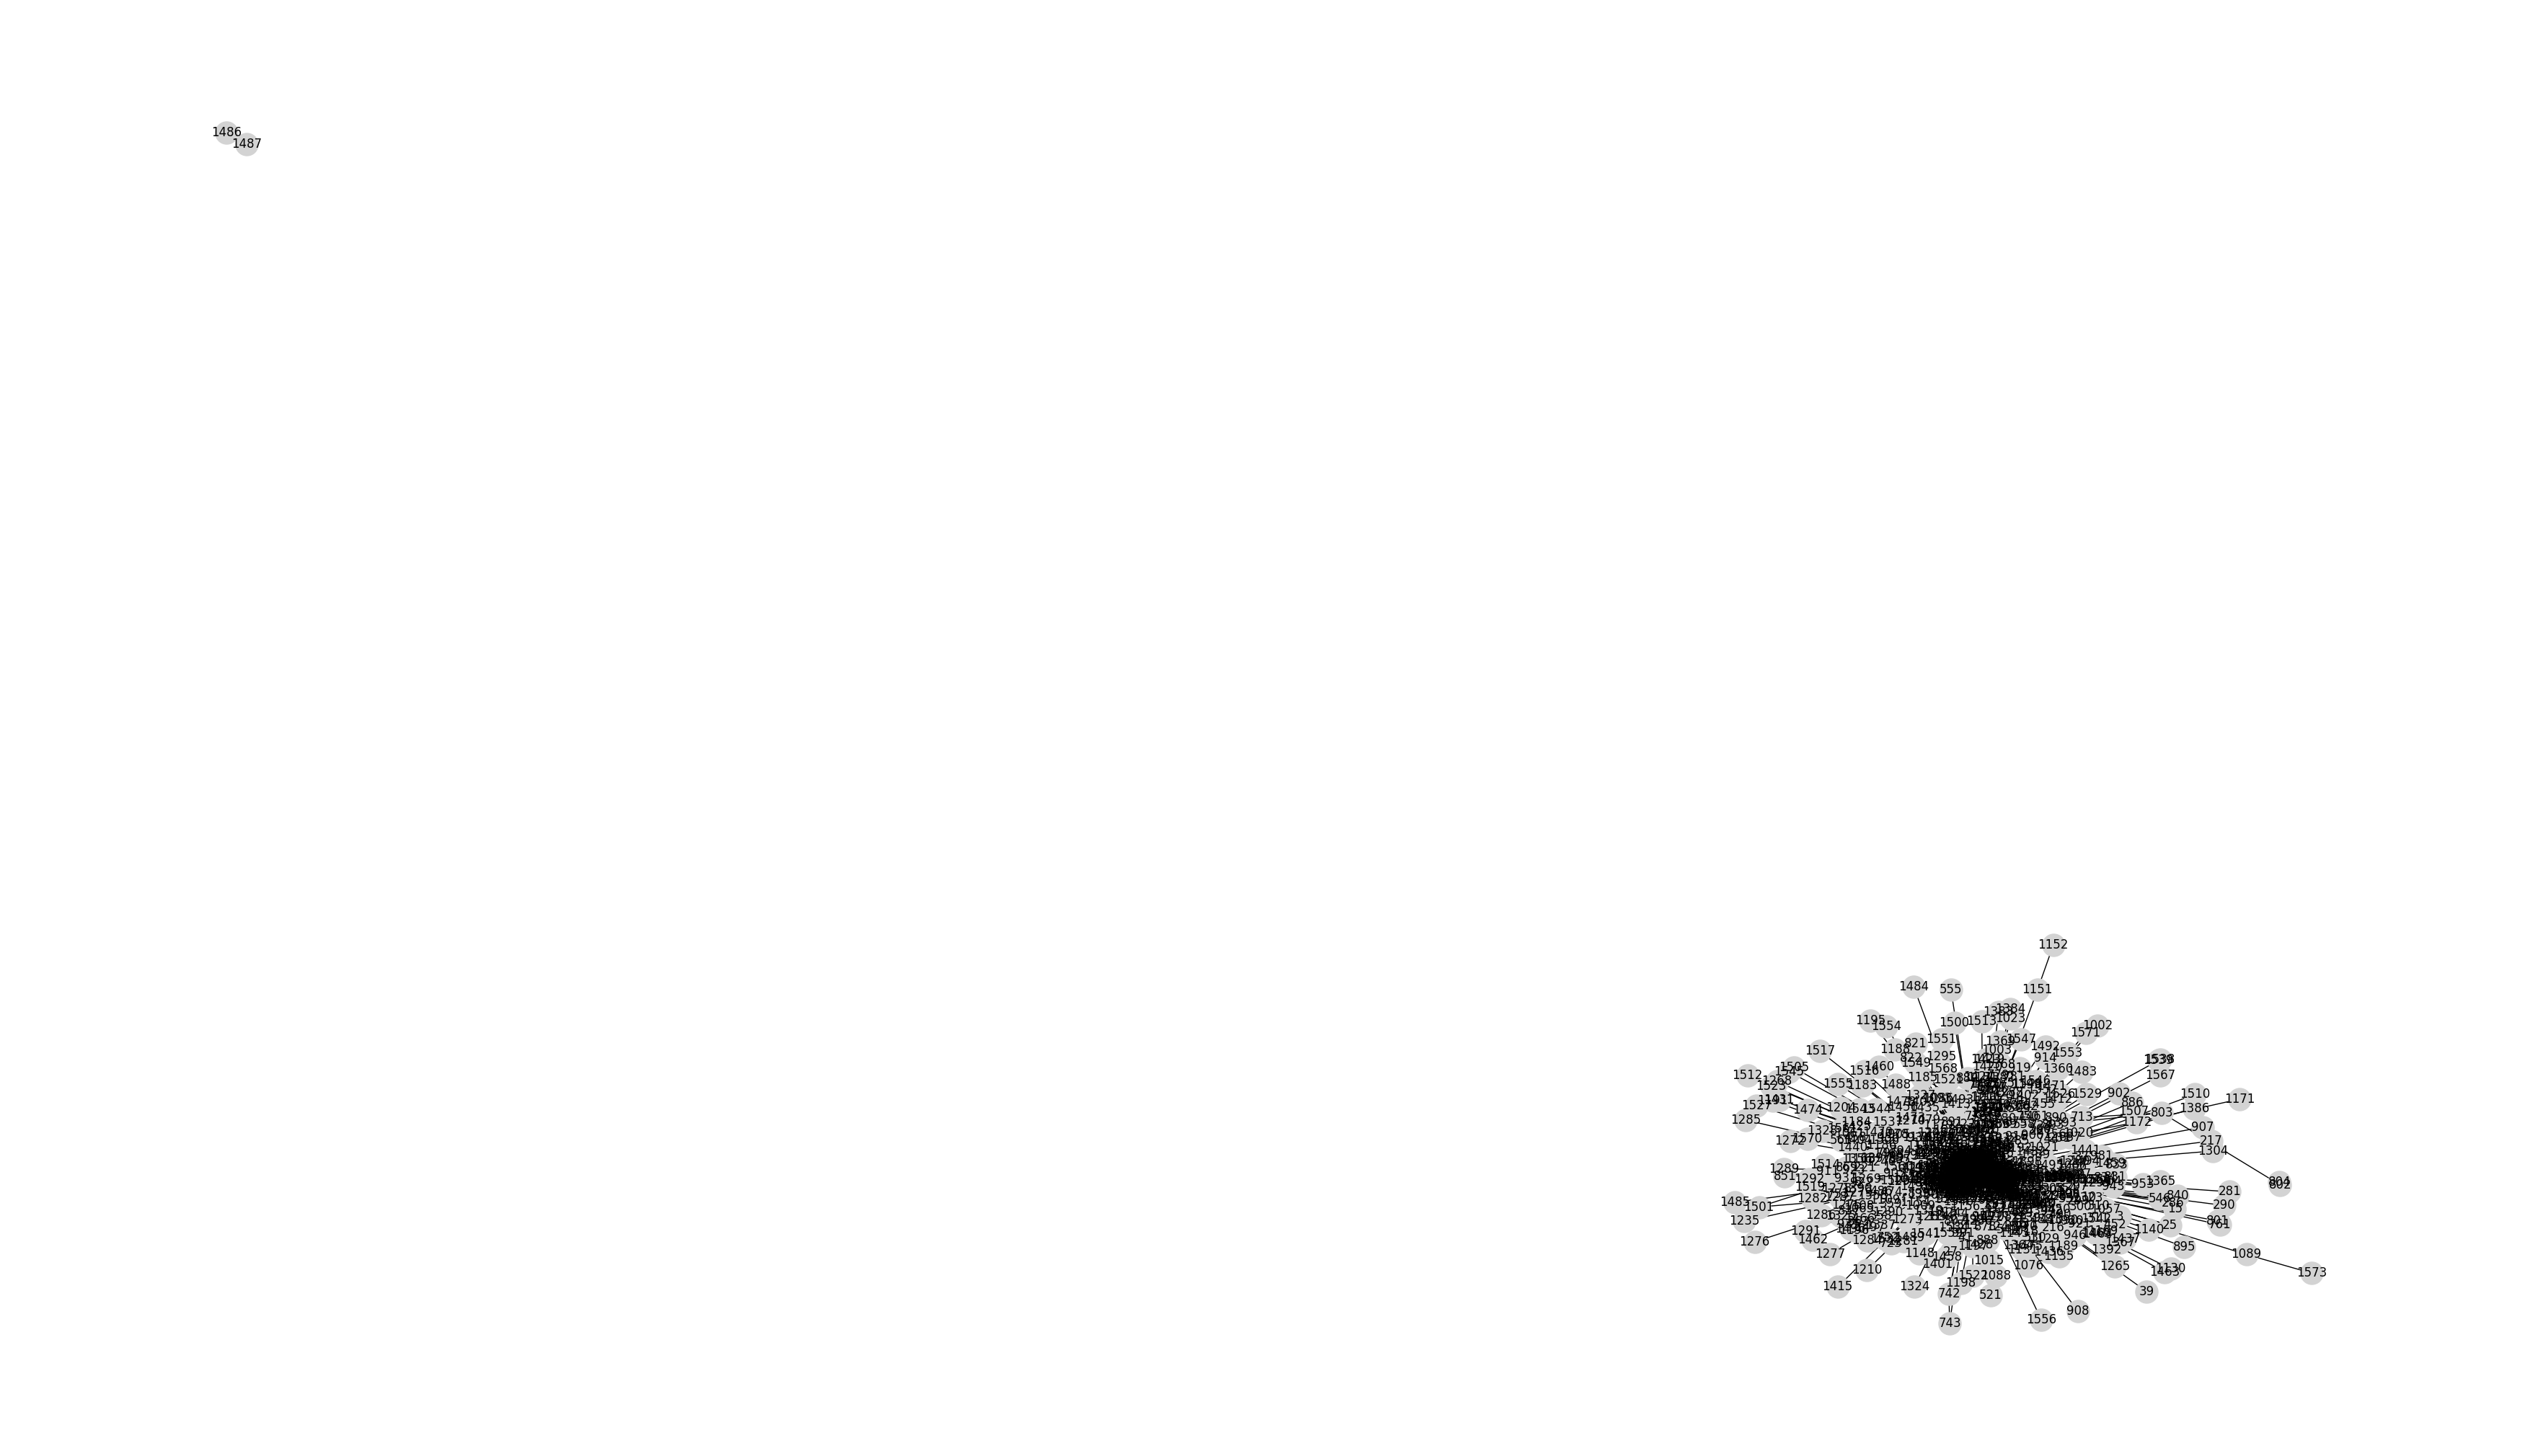

In [25]:
# Leitura da rede
network = 'usairport'
url = f'https://raw.githubusercontent.com/GabrielaSAmaral/ComplexNetworks/main/Dados/{network}.txt'

response = requests.get(url)
with open(f'{network}.txt', 'w') as file:
    file.write(response.text)

G4 = nx.read_edgelist(f'{network}.txt', nodetype=int, data=(('weight',float),))

# Transformando os labels para números inteiros, começando com 0
G4 = nx.convert_node_labels_to_integers(G4, first_label=0)

# Para visualizar a rede
plt.figure(figsize=(35,20))
pos = nx.spring_layout(G4, seed = 13) # Definindo uma seed para sempre obter o mesmo gráfico (mesmas posições)
nx.draw(G4, pos, node_color='lightgray', node_size=500, with_labels=True)

In [26]:
N = len(G3)
M = G3.number_of_edges()
print('Número de nós (vértices):', N)
print('Número de arestas:', M)

Número de nós (vértices): 1174
Número de arestas: 1417


Vamos calular a medida transitividade da rede, que quantifica a ocorrência de triângulos:

In [27]:
CC = (nx.transitivity(G4))
print("Transitivity = ","%3.2f"%CC)

Transitivity =  0.38


Pela medida de transitividade (0.38), obtemos que 38% dos triângulos possíveis de serem formadas na rede, de fato acontecem.

Agora, iremos calcular o average clustering coefficient (coeficiente agrupamento médio):

In [28]:
avc = nx.average_clustering(G4)
print("Average clustering:", "%3.2f"%avc)

Average clustering: 0.50


O coeficiente de agrupamento médio (0.5) da rede indica que, em média, 50% dos vizinhos de um nó possuem conexão entre si.

# **Questão 5:** Calcule o coeficiente de complexidade e a entropia de Shannon para a rede de aeroportos dos EUA (base usairport.txt).


Para esta questão, iremos utilizar a mesma rede da questão anterior (4).

Primeiro, vamos calcular o coeficiente de complexidade dessa rede, utilizando a mesma função criada na questão 2:

In [29]:
def momment(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

In [30]:
def coef_complexity(G):

  momment_k1 = momment(G, 1)
  momment_k2 = momment(G, 2)

  coef_complexity = momment_k2/momment_k1

  return coef_complexity

In [31]:
print("%3.1f"%coef_complexity(G4))

112.2


Temos que a medida de complexidade (112.2) é alta. Assim, sugere-se que a rede de aeroportos dos EUA é complexa.

A medida de complexidade encontrada para a rede de energia elétrica dos EUA na questão 2 foi igual a 3.87, Comparativamente, temos que a rede de aeroportos dos EUA é muito mais complexa que a rede de energia elétrica.

Agora, vamos calcular a entropia de Shannon, com a mesma função apresentada na questão 3:

In [32]:
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

In [33]:
H = shannon_entropy(G4)
print("Shannon Entropy = ", "%3.3f"%H)

Shannon Entropy =  4.986


A entropia de Shannon encontrada para as estradas da Europa na questão 3 foi igual a 2. Comparativamente, temos que a rede de aeroportos dos EUA precisa de mais informação do que a rede de estradas da Europa para explicar sua topologia.